In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.linear_model import LogisticRegression

In [4]:
# Read
diabetes_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
diabetes_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
print(diabetes_df.info())

with pd.option_context('display.max_columns', 40):
    print(diabetes_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000   

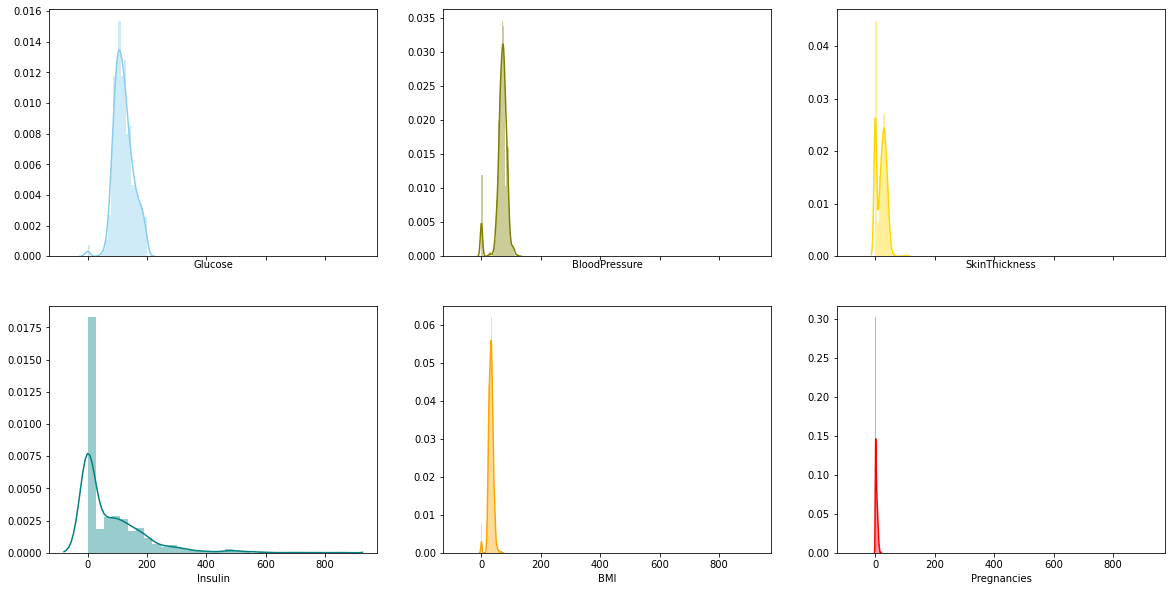

In [7]:
f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)
sns.distplot(diabetes_df["Glucose"] , color="skyblue", ax=axes[0, 0])
sns.distplot(diabetes_df["BloodPressure"] , color="olive", ax=axes[0, 1])
sns.distplot(diabetes_df["SkinThickness"] , color="gold", ax=axes[0, 2])
sns.distplot(diabetes_df["Insulin"] , color="teal", ax=axes[1, 0])
sns.distplot(diabetes_df["BMI"] , color="orange", ax=axes[1, 1])
sns.distplot(diabetes_df["Pregnancies"] , color="red", ax=axes[1, 2])

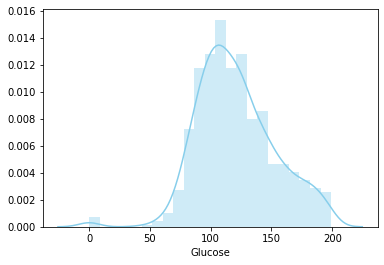

In [8]:
sns.distplot(diabetes_df["Glucose"] , color="skyblue")

In [9]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count=diabetes_df['Glucose'].count()

for feature in zero_features:
  zero_count=diabetes_df[diabetes_df[feature]==0][feature].count()
  print("{0}'s 0 counts: {1}, percent:{2:.2f}%".format(feature, zero_count, 100*zero_count/total_count) )

Glucose's 0 counts: 5, percent:0.65%
BloodPressure's 0 counts: 35, percent:4.56%
SkinThickness's 0 counts: 227, percent:29.56%
Insulin's 0 counts: 374, percent:48.70%
BMI's 0 counts: 11, percent:1.43%


In [10]:
# replace 0 to mean value
mean_zero_features = diabetes_df[zero_features].mean()
print(mean_zero_features)
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0, mean_zero_features)

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64


In [0]:
# Standard Scaling
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [0]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify=y) 

In [0]:
# Fit and Predict
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)


In [0]:
# Build get_clf_eval function
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)

  f1 = f1_score(y_test, pred)
  print("Confusion Matris")
  print(confusion)
  print("Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, f1: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))


In [36]:
# Evaluation
get_clf_eval(y_test, pred)

Confusion Matris
[[90 10]
 [21 33]]
Accuracy: 0.7987, Precision: 0.7674, Recall: 0.6111, f1: 0.6804, AUC: 0.7556


In [0]:
# To improve recall score: using binary thresholds (Trade-off between prescion and recall)
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]

In [0]:
# Build get_eval_by_threshold function
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba, thresholds):
  for threshold in thresholds:
    binarizer = Binarizer(threshold=threshold).fit(pred_proba)
    custom_predict = binarizer.transform(pred_proba)
    print("Threshold: ", threshold)
    get_clf_eval(y_test, custom_predict)
    print("\n")

In [41]:
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

Threshold:  0.3
Confusion Matris
[[67 33]
 [11 43]]
Accuracy: 0.7143, Precision: 0.5658, Recall: 0.7963, f1: 0.6615, AUC: 0.7331


Threshold:  0.33
Confusion Matris
[[72 28]
 [12 42]]
Accuracy: 0.7403, Precision: 0.6000, Recall: 0.7778, f1: 0.6774, AUC: 0.7489


Threshold:  0.36
Confusion Matris
[[76 24]
 [15 39]]
Accuracy: 0.7468, Precision: 0.6190, Recall: 0.7222, f1: 0.6667, AUC: 0.7411


Threshold:  0.39
Confusion Matris
[[78 22]
 [16 38]]
Accuracy: 0.7532, Precision: 0.6333, Recall: 0.7037, f1: 0.6667, AUC: 0.7419


Threshold:  0.42
Confusion Matris
[[84 16]
 [18 36]]
Accuracy: 0.7792, Precision: 0.6923, Recall: 0.6667, f1: 0.6792, AUC: 0.7533


Threshold:  0.45
Confusion Matris
[[85 15]
 [18 36]]
Accuracy: 0.7857, Precision: 0.7059, Recall: 0.6667, f1: 0.6857, AUC: 0.7583


Threshold:  0.48
Confusion Matris
[[88 12]
 [19 35]]
Accuracy: 0.7987, Precision: 0.7447, Recall: 0.6481, f1: 0.6931, AUC: 0.7641


Threshold:  0.5
Confusion Matris
[[90 10]
 [21 33]]
Accuracy: 0.7987, Precisi